In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [22]:
reuters.load_data()

((array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
         list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
         list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 

In [23]:
result = reuters.load_data()

In [24]:
result[0][0][0]

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [25]:
result[0][0]

array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4

In [26]:
len(result), len(result[0]), len(result[0][0]) , len(result[0][0][0])

(2, 2, 8982, 87)

In [27]:
type(result), type(result[0]), type(result[0][0]) , type(result[0][0][0])

(tuple, tuple, numpy.ndarray, list)

In [28]:
result, result[0], np.array(result[0][0]).shape, np.array(result[0][0][0]).shape

(((array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
          list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
          list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 6

In [29]:
help(reuters.load_data)

Help on function load_data in module keras.src.datasets.reuters:

load_data(path='reuters.npz', num_words=None, skip_top=0, maxlen=None, test_split=0.2, seed=113, start_char=1, oov_char=2, index_from=3)
    Loads the Reuters newswire classification dataset.
    
    This is a dataset of 11,228 newswires from Reuters, labeled over 46 topics.
    
    This was originally generated by parsing and preprocessing the classic
    Reuters-21578 dataset, but the preprocessing code is no longer packaged
    with Keras. See this
    [GitHub discussion](https://github.com/keras-team/keras/issues/12072)
    for more info.
    
    Each newswire is encoded as a list of word indexes (integers).
    For convenience, words are indexed by overall frequency in the dataset,
    so that for instance the integer "3" encodes the 3rd most frequent word in
    the data. This allows for quick filtering operations such as:
    "only consider the top 10,000 most
    common words, but eliminate the top 20 most com

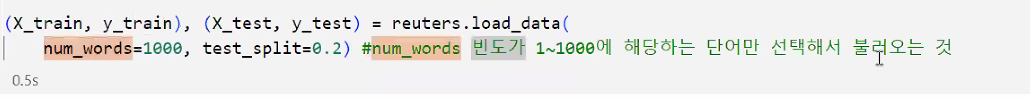

In [30]:
# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, 
                                                         test_split=0.2)

# 데이터를 확인해 보겠습니다.
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])


46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [32]:
(X_train3, y_train3), (X_test3, y_test3) = reuters.load_data(num_words=5000, 
                                                         test_split=0.2)

In [33]:
print(X_train3.shape)
print(y_train3.shape)
print(X_test3.shape)
print(y_test3.shape)

(8982,)
(8982,)
(2246,)
(2246,)


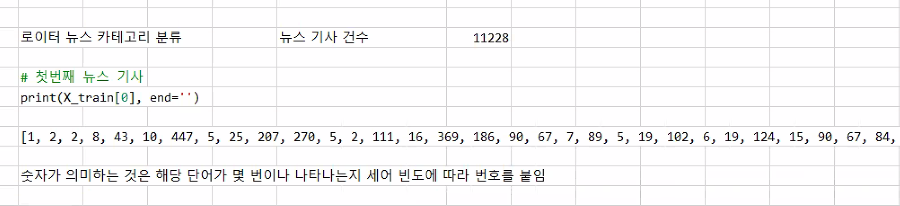

In [34]:
(X_train4, y_train4), (X_test4, y_test4) = reuters.load_data(num_words=10, 
                                                         test_split=0.2)

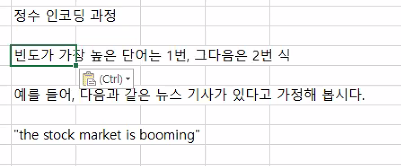

In [35]:
print(X_train4[0], end='')

[1, 2, 2, 8, 2, 2, 2, 5, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 7, 2, 5, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 4, 2, 8, 2, 2, 2, 2, 6, 2, 6, 2, 2, 2, 2, 2, 2, 2, 7, 2, 9, 2, 2, 2, 6, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2]

In [36]:
# 총 뉴스 기사는
# 8982 + 2246

In [37]:
np.unique(X_train[0])

array([  1,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  15,  16,
        17,  19,  22,  25,  26,  29,  30,  32,  39,  43,  44,  48,  49,
        52,  67,  83,  84,  89,  90, 102, 109, 111, 124, 132, 134, 151,
       154, 155, 186, 197, 207, 209, 258, 270, 272, 369, 447, 482, 504,
       864])

In [38]:
# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩 처리를 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))


In [39]:
# 모델의 실행 옵션을 정합니다.
# 학습의 조기 중단을 설정합니다.
# 모델을 실행합니다.
# 테스트 정확도를 출력합니다.

In [40]:

# 모델의 실행 옵션을 정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.4035 - loss: 2.4423 - val_accuracy: 0.5280 - val_loss: 1.8098
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.5556 - loss: 1.7466 - val_accuracy: 0.5993 - val_loss: 1.6096
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.6187 - loss: 1.5035 - val_accuracy: 0.6287 - val_loss: 1.4515
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.6679 - loss: 1.3176 - val_accuracy: 0.6585 - val_loss: 1.3524
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.6909 - loss: 1.2208 - val_accuracy: 0.6692 - val_loss: 1.2652
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.7213 - loss: 1.0916 - val_accuracy: 0.6972 - val_loss: 1.2067
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.7670 - loss: 0.9526 - val_accuracy: 0.7146 - val_loss: 1.1360
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.7813 - loss: 0